In [112]:
!pip install pyproj

  Using cached pyproj-3.7.2-cp312-cp312-win_amd64.whl.metadata (31 kB)
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -----------------------------

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import utm

In [5]:
df = pd.read_csv(r'C:\Users\rezaei\OneDrive\Documents\Bootcamp\pro\final_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984219 entries, 0 to 984218
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   building_size       984219 non-null  float64
 1   rooms_count         984218 non-null  float64
 2   construction_year   984218 non-null  float64
 3   has_balcony         984218 non-null  float64
 4   has_elevator        984218 non-null  float64
 5   has_parking         984218 non-null  float64
 6   is_rebuilt          984218 non-null  float64
 7   floor               984218 non-null  float64
 8   neighborhood_slug   984217 non-null  object 
 9   location_latitude   984219 non-null  float64
 10  location_longitude  984219 non-null  float64
 11  final_price         905977 non-null  float64
dtypes: float64(11), object(1)
memory usage: 90.1+ MB


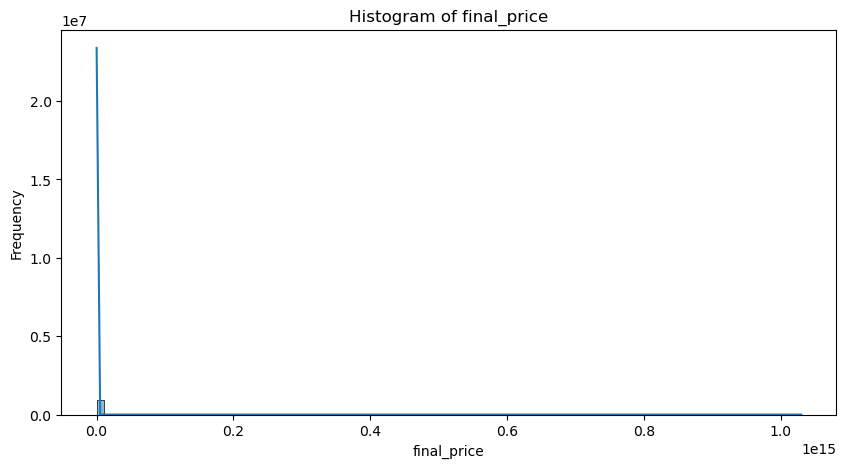

In [15]:
data = df['final_price'].dropna()
plt.figure(figsize=(10,5))
sns.histplot(data, bins=100, kde=True)
plt.title("Histogram of final_price")
plt.xlabel("final_price")
plt.ylabel("Frequency")
plt.show()

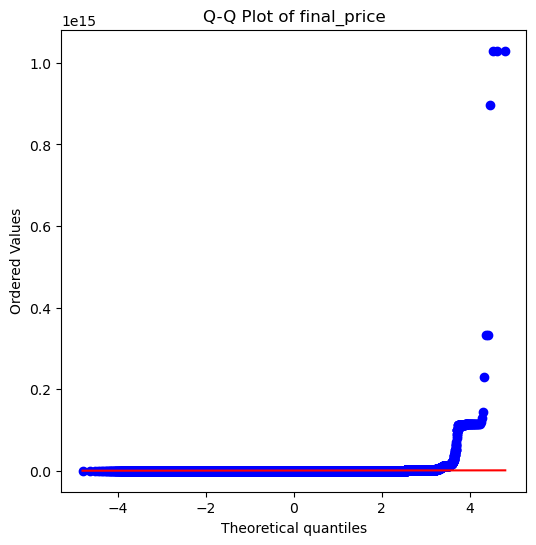

In [17]:
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot of final_price")
plt.show()

In [19]:
df['final_price_log'] = np.log1p(df['final_price'])

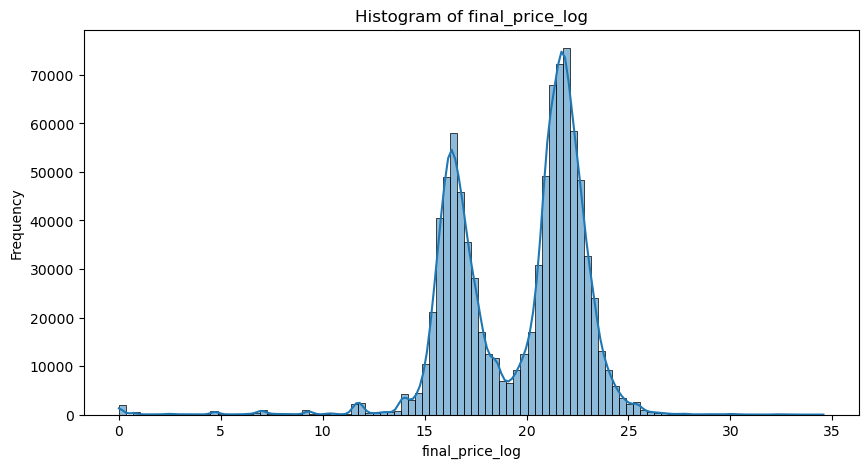

In [23]:
data = df['final_price_log'].dropna()
plt.figure(figsize=(10,5))
sns.histplot(data, bins=100, kde=True)
plt.title("Histogram of final_price_log")
plt.xlabel("final_price_log")
plt.ylabel("Frequency")
plt.show()

In [25]:
Q1 = df['final_price_log'].quantile(0.25)
Q3 = df['final_price_log'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df[(df['final_price_log'] >= lower) & (df['final_price_log'] <= upper)]

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899844 entries, 1 to 984218
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   building_size       899844 non-null  float64
 1   rooms_count         899843 non-null  float64
 2   construction_year   899843 non-null  float64
 3   has_balcony         899843 non-null  float64
 4   has_elevator        899843 non-null  float64
 5   has_parking         899843 non-null  float64
 6   is_rebuilt          899843 non-null  float64
 7   floor               899843 non-null  float64
 8   neighborhood_slug   899842 non-null  object 
 9   location_latitude   899844 non-null  float64
 10  location_longitude  899844 non-null  float64
 11  final_price         899844 non-null  float64
 12  final_price_log     899844 non-null  float64
dtypes: float64(12), object(1)
memory usage: 96.1+ MB


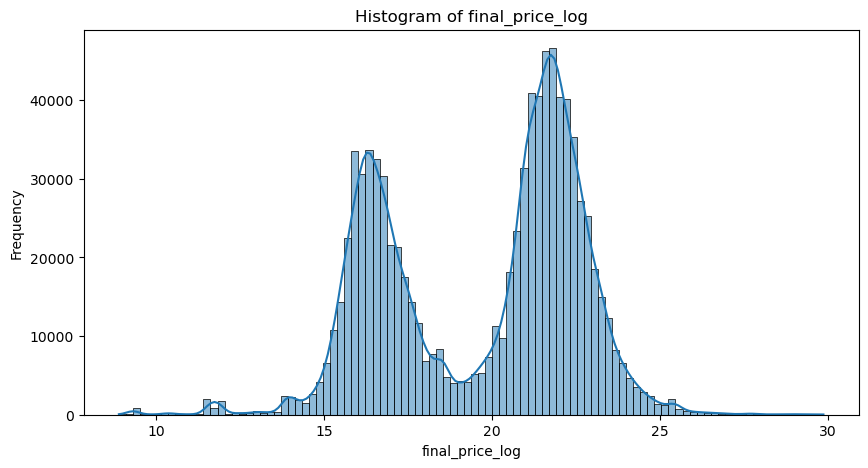

In [29]:
data = df_clean['final_price_log'].dropna()
plt.figure(figsize=(10,5))
sns.histplot(data, bins=100, kde=True)
plt.title("Histogram of final_price_log")
plt.xlabel("final_price_log")
plt.ylabel("Frequency")
plt.show()

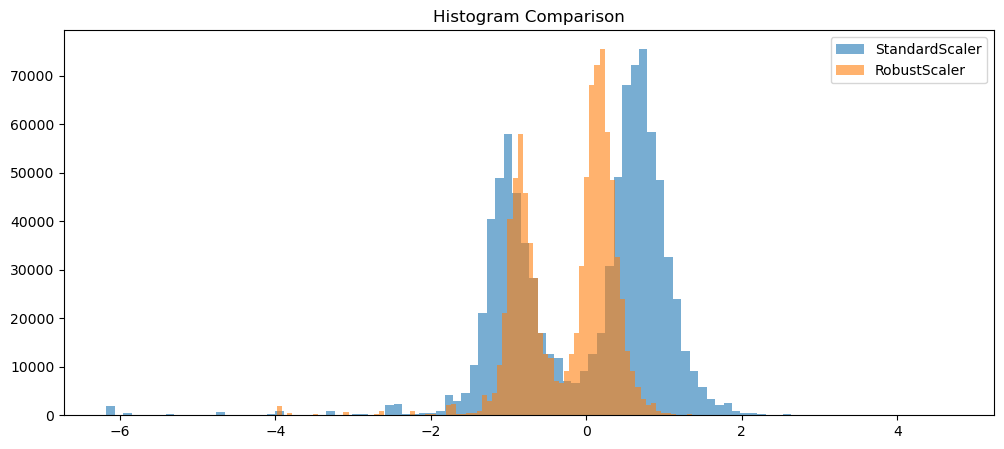

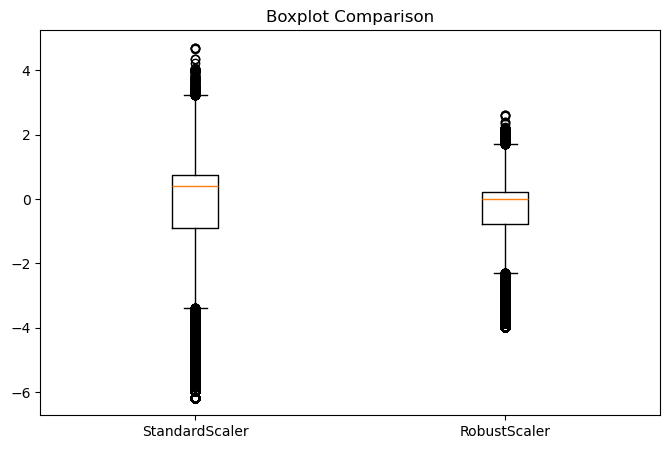

In [31]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# فقط مقادیر غیر NaN
data = df['final_price_log'].dropna().values.reshape(-1, 1)

# اعمال دو نوع Scaler
standard_scaled = StandardScaler().fit_transform(data)
robust_scaled   = RobustScaler().fit_transform(data)

# ---------------- Histogram مقایسه‌ای ----------------
plt.figure(figsize=(12,5))
plt.hist(standard_scaled, bins=100, alpha=0.6, label='StandardScaler')
plt.hist(robust_scaled, bins=100, alpha=0.6, label='RobustScaler')
plt.title("Histogram Comparison")
plt.legend()
plt.show()

# ---------------- Boxplot مقایسه‌ای ----------------
plt.figure(figsize=(8,5))
plt.boxplot([standard_scaled.flatten(), robust_scaled.flatten()],
            labels=['StandardScaler', 'RobustScaler'])
plt.title("Boxplot Comparison")
plt.show()

In [33]:
mask = df['final_price_log'].notna()
data = df.loc[mask, 'final_price_log'].values.reshape(-1, 1)
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)
df.loc[mask, 'final_price_scaled'] = scaled_data

In [39]:
df_clean['neighborhood_slug'].nunique()

1596

In [41]:
df_clean['neighborhood_slug'].unique()

array(['gholhak', 'tohid', 'elahiyeh', ..., 'shaliur', 'janbazan-rasht',
       'jamaran-rasht'], dtype=object)

In [43]:
df_clean['neighborhood_slug'].value_counts()

neighborhood_slug
tabriz                      24689
andisheh-new-town           19031
kermanshah                  15148
urmia                       12244
bandar-abbas                10339
                            ...  
mehregan-lahijan                1
parastar-bandar-e-anzali        1
amir-shahid                     1
volox                           1
jamaran-rasht                   1
Name: count, Length: 1596, dtype: int64

In [45]:
freq_map = df_clean['neighborhood_slug'].value_counts().to_dict()
df_clean['neighborhood_encoded'] = df_clean['neighborhood_slug'].map(freq_map)

C:\Users\rezaei\AppData\Local\Temp\ipykernel_14092\1553273019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['neighborhood_encoded'] = df_clean['neighborhood_slug'].map(freq_map)


In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899844 entries, 1 to 984218
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   building_size         899844 non-null  float64
 1   rooms_count           899843 non-null  float64
 2   construction_year     899843 non-null  float64
 3   has_balcony           899843 non-null  float64
 4   has_elevator          899843 non-null  float64
 5   has_parking           899843 non-null  float64
 6   is_rebuilt            899843 non-null  float64
 7   floor                 899843 non-null  float64
 8   neighborhood_slug     899842 non-null  object 
 9   location_latitude     899844 non-null  float64
 10  location_longitude    899844 non-null  float64
 11  final_price           899844 non-null  float64
 12  final_price_log       899844 non-null  float64
 13  neighborhood_encoded  899842 non-null  float64
dtypes: float64(13), object(1)
memory usage: 103.0+ MB


In [57]:
df_clean = df_clean.drop(['final_price', 'neighborhood_slug'], axis=1)

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899844 entries, 1 to 984218
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   building_size         899844 non-null  float64
 1   rooms_count           899843 non-null  float64
 2   construction_year     899843 non-null  float64
 3   has_balcony           899843 non-null  float64
 4   has_elevator          899843 non-null  float64
 5   has_parking           899843 non-null  float64
 6   is_rebuilt            899843 non-null  float64
 7   floor                 899843 non-null  float64
 8   location_latitude     899844 non-null  float64
 9   location_longitude    899844 non-null  float64
 10  final_price_log       899844 non-null  float64
 11  neighborhood_encoded  899842 non-null  float64
dtypes: float64(12)
memory usage: 89.2 MB


In [61]:
df_clean[df_clean['construction_year'] == -1] 

,building_size,rooms_count,construction_year,has_balcony,has_elevator,has_parking,is_rebuilt,floor,location_latitude,location_longitude,final_price_log,neighborhood_encoded
14,500.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,31.265947,48.568604,20.500122,814.0
16,700.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,35.890186,51.280197,23.613638,418.0
19,500.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,34.333435,58.655319,18.826146,289.0
22,13000.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,35.726871,51.329350,22.227343,981.0
46,212.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,35.726871,51.329350,21.734867,2950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
984171,290.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,35.726871,51.329350,20.863028,4433.0
984184,13000.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,35.726871,51.329350,21.787977,603.0
984195,200.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,32.393036,51.271721,20.946409,231.0
984197,190.0,0.0,-1.0,1.0,-1.0,1.0,0.0,1.0,38.022659,46.386959,18.555600,24689.0


In [63]:
df_proc = df_clean.copy()

# فقط ستون‌های عددی
num_cols = df_proc.select_dtypes(include=[np.number]).columns

for col in num_cols:
    # ساخت ستون باینری برای Missing Indicator
    df_proc[col + '_missing'] = (df_proc[col] == -1).astype(int)

    # جایگزینی -1 با NaN
    df_proc[col] = df_proc[col].replace(-1, np.nan)

    # پر کردن NaN با میانه ستون
    median_value = df_proc[col].median()
    df_proc[col] = df_proc[col].fillna(median_value)

In [65]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899844 entries, 1 to 984218
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   building_size                 899844 non-null  float64
 1   rooms_count                   899844 non-null  float64
 2   construction_year             899844 non-null  float64
 3   has_balcony                   899844 non-null  float64
 4   has_elevator                  899844 non-null  float64
 5   has_parking                   899844 non-null  float64
 6   is_rebuilt                    899844 non-null  float64
 7   floor                         899844 non-null  float64
 8   location_latitude             899844 non-null  float64
 9   location_longitude            899844 non-null  float64
 10  final_price_log               899844 non-null  float64
 11  neighborhood_encoded          899844 non-null  float64
 12  building_size_missing         899844 non-null  in

In [75]:
num_cols = [
    'building_size', 'rooms_count', 'construction_year',
    'has_balcony', 'has_elevator', 'has_parking', 'is_rebuilt',
    'floor', 'final_price_log', 'neighborhood_encoded'
]

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_proc[num_cols])

# تبدیل به دیتافریم
df_scaled = pd.DataFrame(scaled_data, columns=num_cols, index=df_proc.index)

# الحاق دوباره ستون‌های missing
df_final = pd.concat([df_scaled, df_proc[[c for c in df_proc.columns if c.endswith('_missing')]]], axis=1)

In [77]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899844 entries, 1 to 984218
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   building_size                 899844 non-null  float64
 1   rooms_count                   899844 non-null  float64
 2   construction_year             899844 non-null  float64
 3   has_balcony                   899844 non-null  float64
 4   has_elevator                  899844 non-null  float64
 5   has_parking                   899844 non-null  float64
 6   is_rebuilt                    899844 non-null  float64
 7   floor                         899844 non-null  float64
 8   final_price_log               899844 non-null  float64
 9   neighborhood_encoded          899844 non-null  float64
 10  building_size_missing         899844 non-null  int32  
 11  rooms_count_missing           899844 non-null  int32  
 12  construction_year_missing     899844 non-null  in

In [79]:
num_cols = [
    'building_size', 'rooms_count', 'construction_year',
    'has_balcony', 'has_elevator', 'has_parking', 'is_rebuilt',
    'floor', 'final_price_log', 'neighborhood_encoded'
]

X = df_final[num_cols]

# اجرای KMeans با 10 خوشه
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df_final['cluster'] = kmeans.fit_predict(X)

# مراکز خوشه‌ها
centroids = kmeans.cluster_centers_

print("centroids:")
print(pd.DataFrame(centroids, columns=num_cols))

centroids:
   building_size  rooms_count  construction_year  has_balcony  has_elevator  \
0       2.659359    -0.401000          -0.100879    -0.094989     -0.191097   
1   76688.537247    -1.230769          -0.207692    -0.115385     -0.269231   
2   29959.124105    -1.290000          -0.119000    -0.050000     -0.210000   
3   11850.651708    -0.969019          -0.117040    -0.115318     -0.177281   
4  103783.611619    -1.009434          -0.248113    -0.056604     -0.320755   
5   55037.777339    -1.222222          -0.227778    -0.027778     -0.222222   
6    5725.760372    -1.071895          -0.159259    -0.028322     -0.202614   
7   42559.358240    -1.131148          -0.237705    -0.032787     -0.213115   
8   20845.916622    -1.338129          -0.041727    -0.021583     -0.179856   
9    1438.793591    -0.894659          -0.216096    -0.119705     -0.245672   

   has_parking    is_rebuilt         floor  final_price_log  \
0    -0.178882  1.796647e-01  4.842890e-01        -0.226

In [106]:
# نمونه‌گیری 10000 رکورد
sample_idx = np.random.choice(len(X), size=10000, replace=False)
score = silhouette_score(X.iloc[sample_idx], df_final['cluster'].iloc[sample_idx])
print("Silhouette Score (sampled):", score)

Silhouette Score (sampled): 0.9923582710238017


In [108]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

print("CH Score:", calinski_harabasz_score(X, df_final['cluster']))
print("DB Score:", davies_bouldin_score(X, df_final['cluster']))

CH Score: 18995995.438628387
DB Score: 0.4099540223595729


In [120]:
df_clean['cluster'] = df_final['cluster']

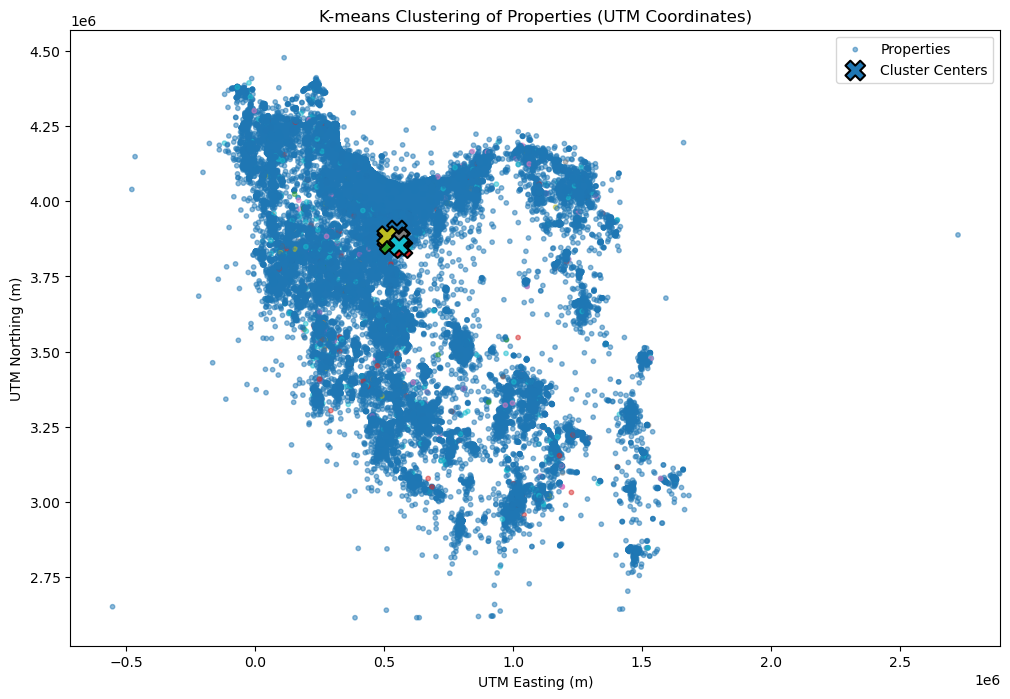

In [122]:
import matplotlib.pyplot as plt
from pyproj import Transformer

# فقط رکوردهایی که مختصات دارن
coords = df_clean[['location_latitude', 'location_longitude', 'final_price_log', 'cluster']].dropna()

# تبدیل مختصات به UTM (اینجا Zone 39N فرض شده، اگر منطقه‌ی داده‌ها فرق داره باید Zone اصلاح بشه)
transformer = Transformer.from_crs("epsg:4326", "epsg:32639", always_xy=True)

coords['UTM_E'], coords['UTM_N'] = transformer.transform(
    coords['location_longitude'].values,
    coords['location_latitude'].values
)

# مراکز خوشه‌ها هم به UTM تبدیل کنیم
centroids = kmeans.cluster_centers_   # از مدل KMeans قبلی
centroids_df = pd.DataFrame(centroids, columns=num_cols)

# برای نمایش مراکز روی نقشه، لازم داریم مختصات مرکز خوشه‌ها در UTM
# چون ما latitude/longitude رو از فیچرها حذف کردیم، اینجا فقط قیمته → پس برای نمایش ساده‌تر فقط X=final_price_log و Y=neighborhood_encoded رو نمی‌خوایم
# پس مراکز جغرافیایی رو از داده‌ی اصلی محاسبه می‌کنیم
centroids_geo = coords.groupby('cluster')[['UTM_E','UTM_N']].mean().reset_index()

# رسم نمودار
plt.figure(figsize=(12, 8))
scatter = plt.scatter(coords['UTM_E'], coords['UTM_N'],
                      c=coords['cluster'], cmap='tab10', alpha=0.5, s=10, label="Properties")

# رسم مراکز خوشه‌ها
plt.scatter(centroids_geo['UTM_E'], centroids_geo['UTM_N'],
            c=centroids_geo['cluster'], cmap='tab10', 
            marker='X', s=200, edgecolor='black', linewidth=1.5, label="Cluster Centers")

# عنوان و برچسب محور
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("K-means Clustering of Properties (UTM Coordinates)")

# legend و colorbar
plt.legend()
plt.show()


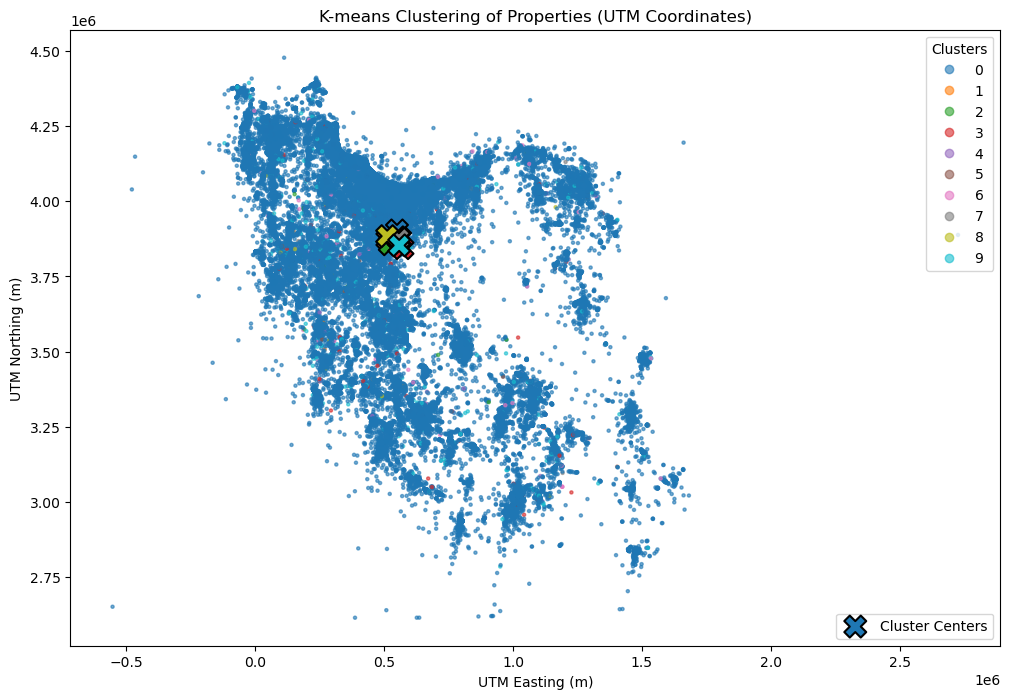

In [124]:
plt.figure(figsize=(12, 8))

# رسم داده‌ها با رنگ‌بندی بر اساس خوشه
scatter = plt.scatter(
    coords['UTM_E'], coords['UTM_N'],
    c=coords['cluster'], cmap='tab10',
    alpha=0.6, s=5
)

# رسم مراکز خوشه‌ها (centroids)
plt.scatter(
    centroids_geo['UTM_E'], centroids_geo['UTM_N'],
    c=centroids_geo['cluster'], cmap='tab10',
    marker='X', s=250, edgecolor='black', linewidth=1.5,
    label="Cluster Centers"
)

# برچسب‌گذاری محورها و عنوان
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("K-means Clustering of Properties (UTM Coordinates)")

# رنگ‌بندی خوشه‌ها در legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc="lower right")

plt.show()


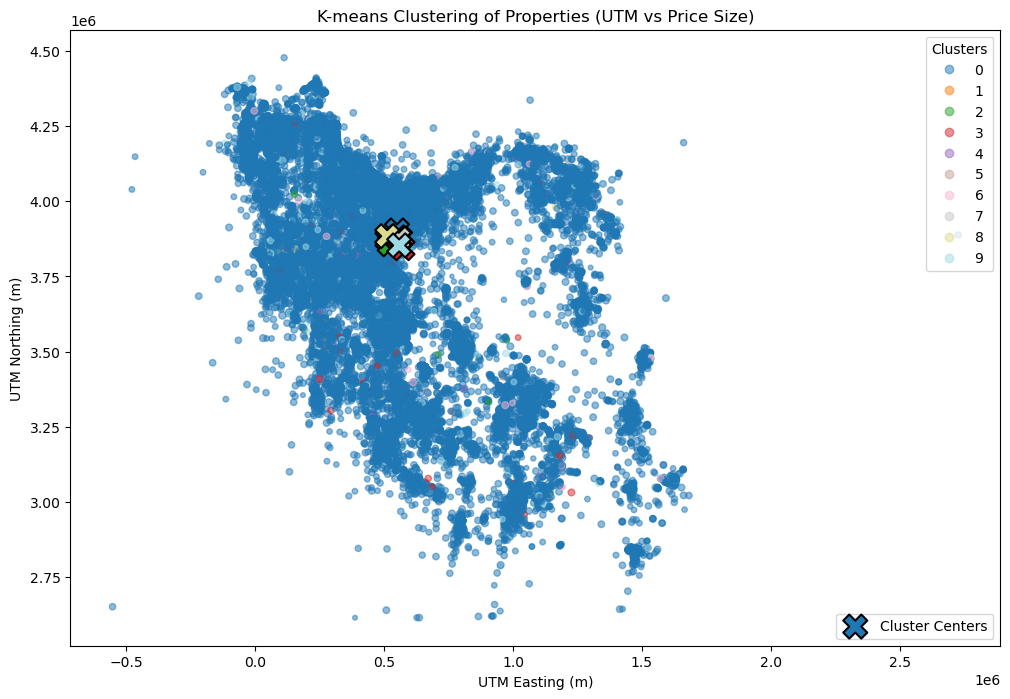

تعداد رکورد در هر خوشه:
cluster
0    895585
9      2715
3       581
6       459
8       139
4       106
2       100
5        72
7        61
1        26
Name: count, dtype: int64


In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# رسم داده‌ها با رنگ خوشه و سایز بر اساس قیمت
scatter = plt.scatter(
    coords['UTM_E'], coords['UTM_N'],
    c=coords['cluster'], cmap='tab20',
    s=coords['final_price_log'],  # اندازه متناسب با قیمت
    alpha=0.5
)

# رسم مراکز خوشه‌ها
plt.scatter(
    centroids_geo['UTM_E'], centroids_geo['UTM_N'],
    c=centroids_geo['cluster'], cmap='tab20',
    marker='X', s=300, edgecolor='black', linewidth=1.5,
    label="Cluster Centers"
)

# برچسب‌گذاری محورها و عنوان
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("K-means Clustering of Properties (UTM vs Price Size)")

# legend برای خوشه‌ها
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc="lower right")

plt.show()

# تعداد اعضای هر خوشه
print("تعداد رکورد در هر خوشه:")
print(coords['cluster'].value_counts())


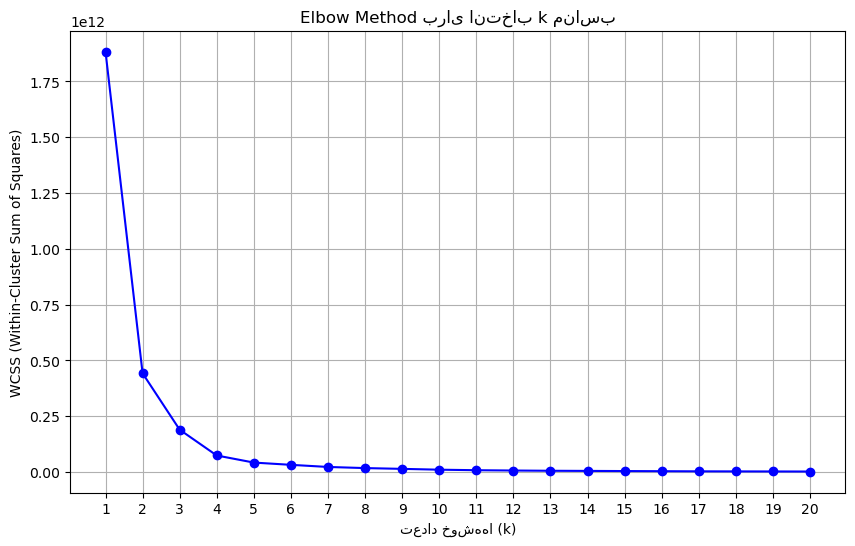

In [130]:
num_cols = [
    'building_size', 'rooms_count', 'construction_year',
    'has_balcony', 'has_elevator', 'has_parking', 'is_rebuilt',
    'floor', 'final_price_log', 'neighborhood_encoded'
]

X = df_final[num_cols]

wcss = []
K = range(1, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # مجموع مجذورات درون خوشه‌ای

# رسم نمودار Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, 'bo-')
plt.xlabel("تعداد خوشه‌ها (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method برای انتخاب k مناسب")
plt.xticks(K)
plt.grid(True)
plt.show()

In [134]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


num_cols = [
    'building_size', 'rooms_count', 'construction_year',
    'has_balcony', 'has_elevator', 'has_parking', 'is_rebuilt',
    'floor', 'final_price_log', 'neighborhood_encoded'
]

X = df_final[num_cols]

results = {}

for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)

    # محاسبه متریک‌ها
    ch = calinski_harabasz_score(X, clusters)
    db = davies_bouldin_score(X, clusters)

    results[k] = {'CH Score': ch, 'DB Score': db}


for k, metrics in results.items():
    print(f"\nنتایج برای k={k}:")
    print(f"  Calinski-Harabasz Score = {metrics['CH Score']}")
    print(f"  Davies-Bouldin Score    = {metrics['DB Score']}")



نتایج برای k=3:
  Calinski-Harabasz Score = 4033099.4067021897
  Davies-Bouldin Score    = 0.3311895074812656

نتایج برای k=4:
  Calinski-Harabasz Score = 7390094.270485251
  Davies-Bouldin Score    = 0.36401053920984094


In [136]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899844 entries, 1 to 984218
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   building_size         899844 non-null  float64
 1   rooms_count           899843 non-null  float64
 2   construction_year     899843 non-null  float64
 3   has_balcony           899843 non-null  float64
 4   has_elevator          899843 non-null  float64
 5   has_parking           899843 non-null  float64
 6   is_rebuilt            899843 non-null  float64
 7   floor                 899843 non-null  float64
 8   location_latitude     899844 non-null  float64
 9   location_longitude    899844 non-null  float64
 10  final_price_log       899844 non-null  float64
 11  neighborhood_encoded  899842 non-null  float64
 12  cluster               899844 non-null  int32  
dtypes: float64(12), int32(1)
memory usage: 92.7 MB


In [142]:
col = ['transformable_price']
divar = pd.read_csv(r'C:\Users\rezaei\OneDrive\Documents\Bootcamp\pro\Divar.csv', usecols=col)

In [144]:
df_clean['transformable_price'] = divar['transformable_price']

In [146]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899844 entries, 1 to 984218
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   building_size         899844 non-null  float64
 1   rooms_count           899843 non-null  float64
 2   construction_year     899843 non-null  float64
 3   has_balcony           899843 non-null  float64
 4   has_elevator          899843 non-null  float64
 5   has_parking           899843 non-null  float64
 6   is_rebuilt            899843 non-null  float64
 7   floor                 899843 non-null  float64
 8   location_latitude     899844 non-null  float64
 9   location_longitude    899844 non-null  float64
 10  final_price_log       899844 non-null  float64
 11  neighborhood_encoded  899842 non-null  float64
 12  cluster               899844 non-null  int32  
 13  UTM_E                 899844 non-null  float64
 14  UTM_N                 899844 non-null  float64
 15  trans

In [152]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from pyproj import Transformer
import matplotlib.pyplot as plt

# مرحله 1: تبدیل مختصات به UTM
transformer = Transformer.from_crs("epsg:4326", "epsg:32639", always_xy=True)

df_clean['UTM_E'], df_clean['UTM_N'] = transformer.transform(
    df_clean['location_longitude'].values,
    df_clean['location_latitude'].values
)

# مرحله 2: انتخاب فیچرها
features = df_clean[['UTM_E', 'UTM_N', 'transformable_price']].dropna()

# مرحله 3: Scaling
scaler = StandardScaler()
X = scaler.fit_transform(features)

# مرحله 4: اجرای DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=50)  # مقدارها باید تنظیم بشن
clusters = dbscan.fit_predict(X)

features['cluster'] = clusters

# نمایش تعداد رکورد در هر خوشه
print(features['cluster'].value_counts())

# مرحله 5: رسم
plt.figure(figsize=(10, 6))
plt.scatter(features['UTM_E'], features['UTM_N'], c=features['cluster'], cmap='tab10', s=5)
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("DBSCAN Clustering (UTM + Price)")
plt.show()


MemoryError: 

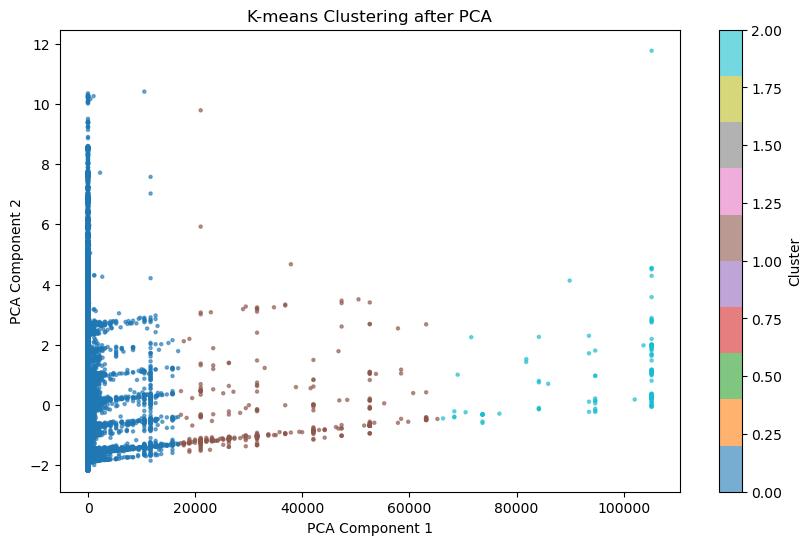

Explained variance ratio: [9.99997728e-01 6.80207178e-07]


In [154]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# فیچرهای عددی
num_cols = [
    'building_size', 'rooms_count', 'construction_year',
    'has_balcony', 'has_elevator', 'has_parking', 'is_rebuilt',
    'floor', 'final_price_log', 'neighborhood_encoded'
]

X = df_final[num_cols]

# مرحله 1: Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# مرحله 2: PCA (کاهش به 2 مؤلفه برای رسم)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# مرحله 3: KMeans روی داده‌ی کاهش‌یافته
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# اضافه کردن خوشه به دیتا
df_final['pca_cluster'] = clusters

# مرحله 4: رسم
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=5, alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-means Clustering after PCA")
plt.colorbar(label="Cluster")
plt.show()

# نمایش واریانس توضیح داده‌شده توسط PCA
print("Explained variance ratio:", pca.explained_variance_ratio_)


In [156]:
df_final['building_size_log'] = np.log1p(df_final['building_size'])

C:\Users\rezaei\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\rezaei\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


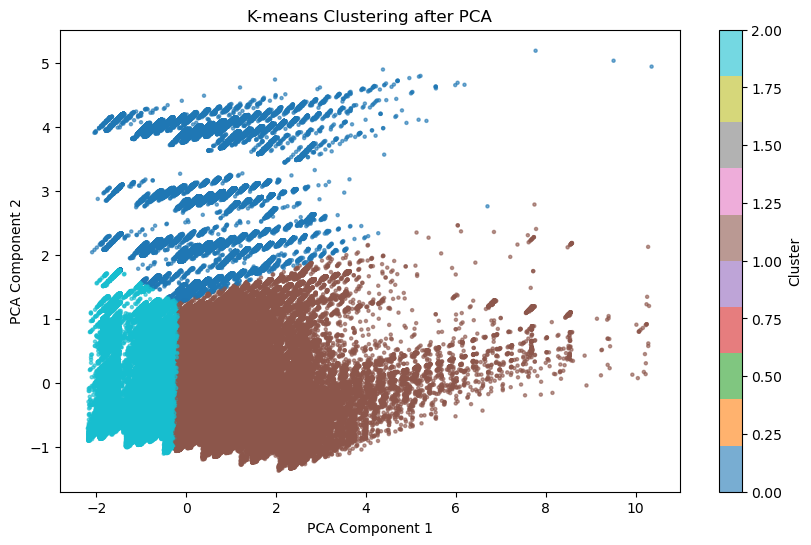

Explained variance ratio: [0.29944561 0.23574321]


In [160]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# فیچرهای عددی
num_cols = [
    'rooms_count', 'construction_year',
    'has_balcony', 'has_elevator', 'has_parking', 'is_rebuilt',
    'floor', 'final_price_log', 'neighborhood_encoded'
]

X = df_final[num_cols]

# مرحله 1: Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# مرحله 2: PCA (کاهش به 2 مؤلفه برای رسم)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# مرحله 3: KMeans روی داده‌ی کاهش‌یافته
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# اضافه کردن خوشه به دیتا
df_final['pca_cluster'] = clusters

# مرحله 4: رسم
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=5, alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-means Clustering after PCA")
plt.colorbar(label="Cluster")
plt.show()

# نمایش واریانس توضیح داده‌شده توسط PCA
print("Explained variance ratio:", pca.explained_variance_ratio_)

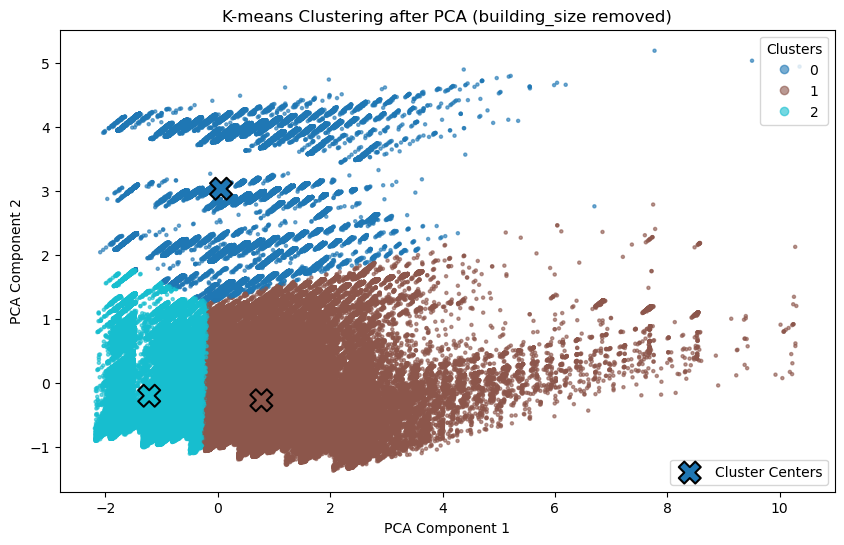

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

# اجرای دوباره KMeans با 3 خوشه (روی داده‌ی PCA)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# اضافه کردن خوشه‌ها به دیتافریم
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# مراکز خوشه‌ها در فضای PCA
centroids = kmeans.cluster_centers_

# رسم نمودار
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['cluster'], cmap='tab10', s=5, alpha=0.6
)

# مراکز خوشه‌ها
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c=range(3), cmap='tab10',
    marker='X', s=250, edgecolor='black', linewidth=1.5,
    label="Cluster Centers"
)

# برچسب و عنوان
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-means Clustering after PCA (building_size removed)")

# legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc="lower right")

plt.show()


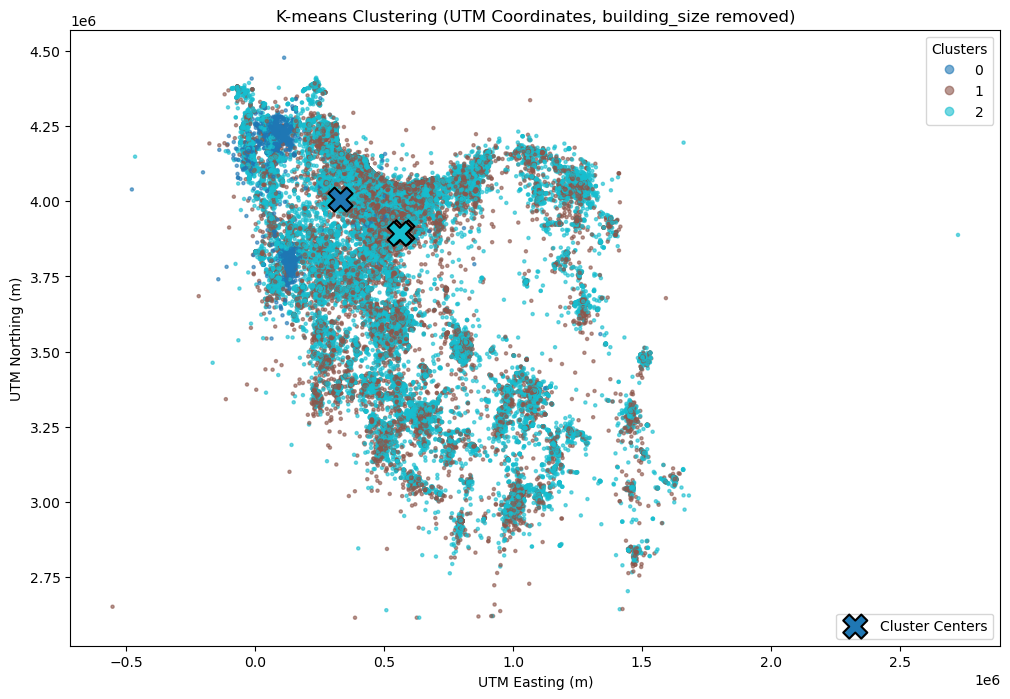

In [164]:
import matplotlib.pyplot as plt

# اجرای KMeans روی فیچرهای انتخابی (بدون building_size)
num_cols = [
    'rooms_count', 'construction_year', 'has_balcony',
    'has_elevator', 'has_parking', 'is_rebuilt',
    'floor', 'final_price_log', 'neighborhood_encoded'
]

X = df_final[num_cols]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['cluster'] = kmeans.fit_predict(X)

# محاسبه مراکز خوشه‌ها در مختصات UTM
centroids_geo = df_clean.groupby('cluster')[['UTM_E','UTM_N']].mean().reset_index()

# رسم scatter
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_clean['UTM_E'], df_clean['UTM_N'],
    c=df_clean['cluster'], cmap='tab10', s=5, alpha=0.6
)

# رسم مراکز خوشه‌ها
plt.scatter(
    centroids_geo['UTM_E'], centroids_geo['UTM_N'],
    c=centroids_geo['cluster'], cmap='tab10',
    marker='X', s=300, edgecolor='black', linewidth=1.5,
    label="Cluster Centers"
)

# برچسب محورها و عنوان
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("K-means Clustering (UTM Coordinates, building_size removed)")

# Legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc="lower right")

plt.show()


In [166]:
num_cols = [
    'rooms_count', 'construction_year',
    'has_balcony', 'has_elevator', 'has_parking', 'is_rebuilt',
    'floor', 'final_price_log', 'neighborhood_encoded'
]

X = df_final[num_cols]

# اجرای KMeans با 10 خوشه
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df_final['cluster'] = kmeans.fit_predict(X)

# مراکز خوشه‌ها
centroids = kmeans.cluster_centers_

print("centroids:")
print(pd.DataFrame(centroids, columns=num_cols))

centroids:
   rooms_count  construction_year  has_balcony  has_elevator  has_parking  \
0     1.641379          -1.442230    -0.169924     -0.220488    -0.172578   
1     0.160856           0.215893    -0.061087     -0.138335    -0.159644   
2    -0.573775          -1.187922    -0.235373     -0.588275    -0.468823   
3     0.141807           0.200240    -0.023872     -0.044159    -0.104327   
4     1.264967           0.405599    -0.037984     -0.056206    -0.035104   
5     0.204700           0.400023    -0.007599     -0.005495    -0.056699   
6    -0.331223           0.215475    -0.124179     -0.198229    -0.203519   
7    -1.630319          -0.077864    -0.104092     -0.123786    -0.175230   
8    -1.999873           0.009279    -0.021688     -0.043503    -0.037133   
9    -0.517474          -0.132796    -0.093864     -0.305228    -0.188102   

   is_rebuilt     floor  final_price_log  neighborhood_encoded  
0    0.314549  0.160297        -0.225539              0.110411  
1    0.1814

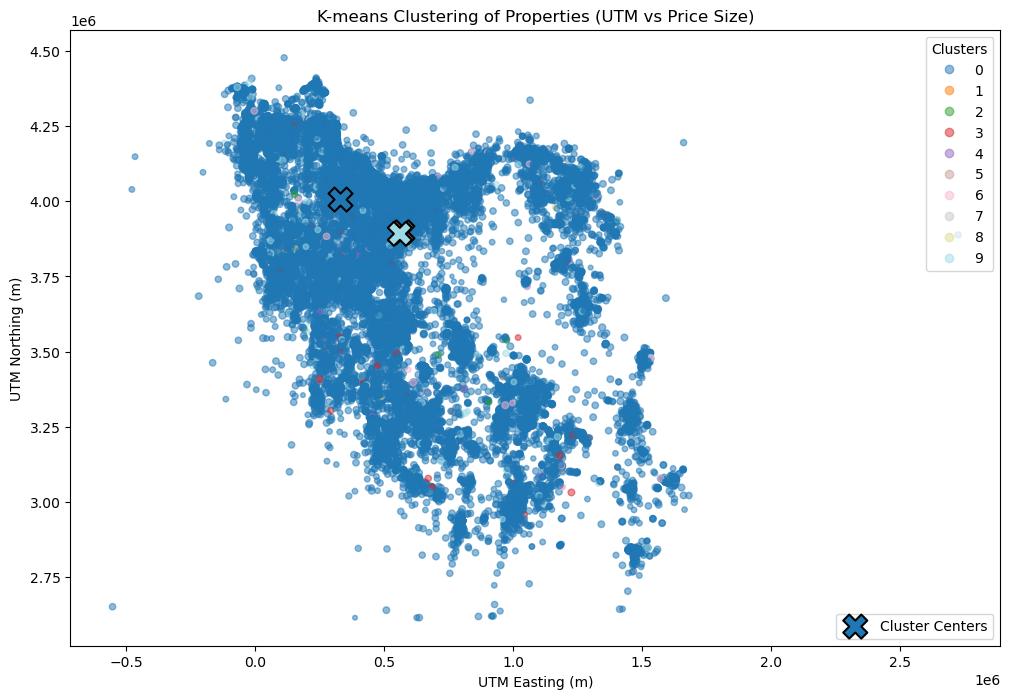

تعداد رکورد در هر خوشه:
cluster
0    895585
9      2715
3       581
6       459
8       139
4       106
2       100
5        72
7        61
1        26
Name: count, dtype: int64


In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# رسم داده‌ها با رنگ خوشه و سایز بر اساس قیمت
scatter = plt.scatter(
    coords['UTM_E'], coords['UTM_N'],
    c=coords['cluster'], cmap='tab20',
    s=coords['final_price_log'],  # اندازه متناسب با قیمت
    alpha=0.5
)

# رسم مراکز خوشه‌ها
plt.scatter(
    centroids_geo['UTM_E'], centroids_geo['UTM_N'],
    c=centroids_geo['cluster'], cmap='tab20',
    marker='X', s=300, edgecolor='black', linewidth=1.5,
    label="Cluster Centers"
)

# برچسب‌گذاری محورها و عنوان
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("K-means Clustering of Properties (UTM vs Price Size)")

# legend برای خوشه‌ها
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc="lower right")

plt.show()

# تعداد اعضای هر خوشه
print("تعداد رکورد در هر خوشه:")
print(coords['cluster'].value_counts())